Loading , Visualizing and describing the data 

In [1]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import matplotlib.pyplot as plt

In [25]:

shapefile_path = "Datasets\\Country\\Country.shp"

country_gdf = gpd.read_file(shapefile_path, encoding='utf-8')


print("Country Data:")
print(country_gdf.info())
print(country_gdf.head())


Country Data:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27272 entries, 0 to 27271
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        27272 non-null  float64 
 1   PERIMETER   27272 non-null  float64 
 2   CNT1M_1_    27272 non-null  int64   
 3   CNT1M_1_ID  27272 non-null  int64   
 4   FAO_NAME    27272 non-null  object  
 5   FAO_CODE    27272 non-null  int32   
 6   UN_CODE     27272 non-null  int32   
 7   ISO_CODE    27270 non-null  object  
 8   CNTRY_NAME  27272 non-null  object  
 9   ISO3_CODE   27272 non-null  object  
 10  geometry    27272 non-null  geometry
dtypes: float64(2), geometry(1), int32(2), int64(2), object(4)
memory usage: 2.1+ MB
None
         AREA   PERIMETER  CNT1M_1_  CNT1M_1_ID   FAO_NAME  FAO_CODE  UN_CODE  \
0  649.422101  900.013634         2           1  Greenland        85      304   
1    0.002037    0.262890         3           2  Greenland        85   

In [26]:
algeria_gdf = country_gdf[country_gdf['FAO_NAME'] == "Algeria"]
algeria_gdf

,AREA,PERIMETER,CNT1M_1_,CNT1M_1_ID,FAO_NAME,FAO_CODE,UN_CODE,ISO_CODE,CNTRY_NAME,ISO3_CODE,geometry
12822,213.434727,73.435570,12824,11914,Algeria,4,12,DZ,Algeria,DZA,"POLYGON ((7.51832 37.03624, 7.52736 37.02525, ..."
13013,0.000072,0.033402,13015,11939,Algeria,4,12,DZ,Algeria,DZA,"POLYGON ((-0.89577 35.77688, -0.89942 35.77692..."
13017,0.000111,0.044937,13019,11942,Algeria,4,12,DZ,Algeria,DZA,"POLYGON ((-1.13231 35.72762, -1.13595 35.72835..."


In [20]:

soil_data_path = "Datasets\\soil_dz_allprops.csv"


soil_df = pd.read_csv(soil_data_path)


print("Soil Data:")
print(len(soil_df))
print(soil_df.info())
print(soil_df.head())



Soil Data:
295
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sand % topsoil    295 non-null    float64
 1   sand % subsoil    295 non-null    float64
 2   silt % topsoil    295 non-null    float64
 3   silt% subsoil     295 non-null    float64
 4   clay % topsoil    295 non-null    float64
 5   clay % subsoil    295 non-null    float64
 6   pH water topsoil  295 non-null    float64
 7   pH water subsoil  295 non-null    float64
 8   OC % topsoil      295 non-null    float64
 9   OC % subsoil      295 non-null    float64
 10  N % topsoil       295 non-null    float64
 11  N % subsoil       295 non-null    float64
 12  BS % topsoil      295 non-null    float64
 13  BS % subsoil      295 non-null    float64
 14  CEC topsoil       295 non-null    float64
 15  CEC subsoil       295 non-null    float64
 16  CEC clay topsoil  295 non-nul

In [21]:
def is_valid_wkt(wkt_str):
    return isinstance(wkt_str, str) and wkt_str.startswith('POLYGON') and wkt_str.endswith(')')


def clean_wkt_load(wkt_str):
    if not is_valid_wkt(wkt_str):
        print(f"Invalid WKT format: {wkt_str}")
        return None  

    try:
        geom = wkt.loads(wkt_str)
        
        if geom.is_valid:
            return geom
        else:
            print(f"Invalid geometry found, attempting to fix: {wkt_str}")
            fixed_geom = geom.buffer(0)
            if fixed_geom.is_valid:
                return fixed_geom
            else:
                print(f"Could not fix geometry: {wkt_str}")
                return None
    except Exception as e:
        print(f"Error loading geometry: {e} for string: {wkt_str}")
        return None  


soil_df['geometry'] = soil_df['geometry'].apply(clean_wkt_load)


soil_df = soil_df[soil_df['geometry'].notnull()]


soil_gdf = gpd.GeoDataFrame(soil_df, geometry='geometry')



In [22]:
dataset_description = {}
dataset_description["Rows Number"] = soil_gdf.shape[0]
dataset_description["Columns Number"] = soil_gdf.shape[1]
dataset_description["Usage of memory"] = str(soil_gdf.memory_usage(index=False).sum() / 1024) + " ko"
dataset_description["Data types"] = list(map(str, soil_gdf.dtypes.unique().tolist()))
pd.DataFrame.from_dict(dataset_description, orient='index', columns = [""])

,
Rows Number,295
Columns Number,25
Usage of memory,57.6171875 ko
Data types,"[float64, geometry]"


In [23]:
colonnes_description = []
for d in soil_gdf:
    colonnes_description.append([d, soil_gdf[d].count(), str(soil_gdf.dtypes[d])])
pd.DataFrame(colonnes_description, columns = ["Name","Values not null","Type"])

,Name,Values not null,Type
0,sand % topsoil,295,float64
1,sand % subsoil,295,float64
2,silt % topsoil,295,float64
3,silt% subsoil,295,float64
4,clay % topsoil,295,float64
5,clay % subsoil,295,float64
6,pH water topsoil,295,float64
7,pH water subsoil,295,float64
8,OC % topsoil,295,float64
9,OC % subsoil,295,float64


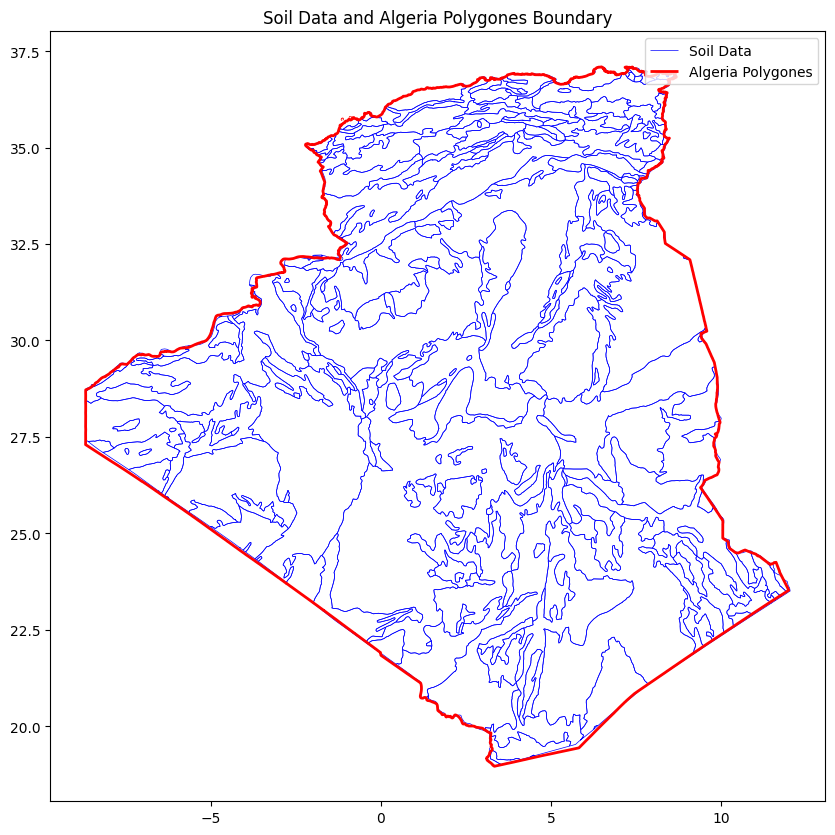

In [27]:
import matplotlib.pyplot as plt

# Plotting the original soil data and Algeria area
fig, ax = plt.subplots(figsize=(10, 10))
soil_gdf.boundary.plot(ax=ax, color='blue', linewidth=0.5, label='Soil Data')
algeria_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Algeria Polygones')
plt.legend()
plt.title("Soil Data and Algeria Polygones Boundary")
plt.show()


In [12]:
import xarray as xr
import rioxarray
import dask
import geopandas as gpd
from shapely.geometry import Point
import os

# Seting the path for climate data files and country shapefile
nc_folder_path = "Datasets/Climate-DATA/"


# Select only the largest polygon (mainland Algeria)
#mainland_algeria = algeria_gdf.geometry.iloc[0]

# Step 1: Loading climate data with Dask and set up spatial dimensions
climate_ds = xr.open_mfdataset(os.path.join(nc_folder_path, "*.nc"), 
                               combine='by_coords', 
                               parallel=True, 
                               engine='netcdf4')

# Step 2: Set spatial dimensions and CRS for Dask array and clip
climate_ds = climate_ds.rio.set_spatial_dims(x_dim='lon', y_dim='lat')
climate_ds = climate_ds.rio.write_crs(algeria_gdf.crs)

# Clip the climate data to only the mainland Algeria bounds
#climate_ds_algeria = climate_ds.rio.clip_box(*mainland_algeria.bounds)

climate_ds_algeria = climate_ds.rio.clip([algeria_gdf.unary_union], crs=algeria_gdf.crs, drop=True)



C:\Users\Dell\AppData\Local\Temp\ipykernel_10272\1952885384.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  climate_ds_algeria = climate_ds.rio.clip([algeria_gdf.unary_union], crs=algeria_gdf.crs, drop=True)


In [13]:
df_climate = climate_ds_algeria.to_dataframe().reset_index()
df_climate['geometry'] = [Point(xy) for xy in zip(df_climate['lon'], df_climate['lat'])]
gdf_climate = gpd.GeoDataFrame(df_climate, geometry='geometry')
gdf_climate = gdf_climate.set_crs(algeria_gdf.crs, allow_override=True)


In [ ]:
dataset_description = {}
dataset_description["Rows Number"] = gdf_climate.shape[0]
dataset_description["Columns Number"] = gdf_climate.shape[1]
dataset_description["Usage of memory"] = str(gdf_climate.memory_usage(index=False).sum() / 1024) + " ko"
dataset_description["Data types"] = list(map(str, gdf_climate.dtypes.unique().tolist()))
pd.DataFrame.from_dict(dataset_description, orient='index', columns = [""])

,
Rows Number,12929760
Columns Number,11
Usage of memory,757603.125 ko
Data types,"[datetime64[ns], float64, int32, float32, geom..."


In [ ]:
colonnes_description = []
for d in gdf_climate:
    colonnes_description.append([d, gdf_climate[d].count(), str(gdf_climate.dtypes[d])])
pd.DataFrame(colonnes_description, columns = ["Name","Values not null","Type"])


,Name,Values not null,Type
0,time,12929760,datetime64[ns]
1,lon,12929760,float64
2,lat,12929760,float64
3,spatial_ref,12929760,int32
4,PSurf,7498560,float32
5,Qair,7498560,float32
6,Rainf,7498560,float32
7,Snowf,7498560,float32
8,Tair,7498560,float32
9,Wind,7498560,float32


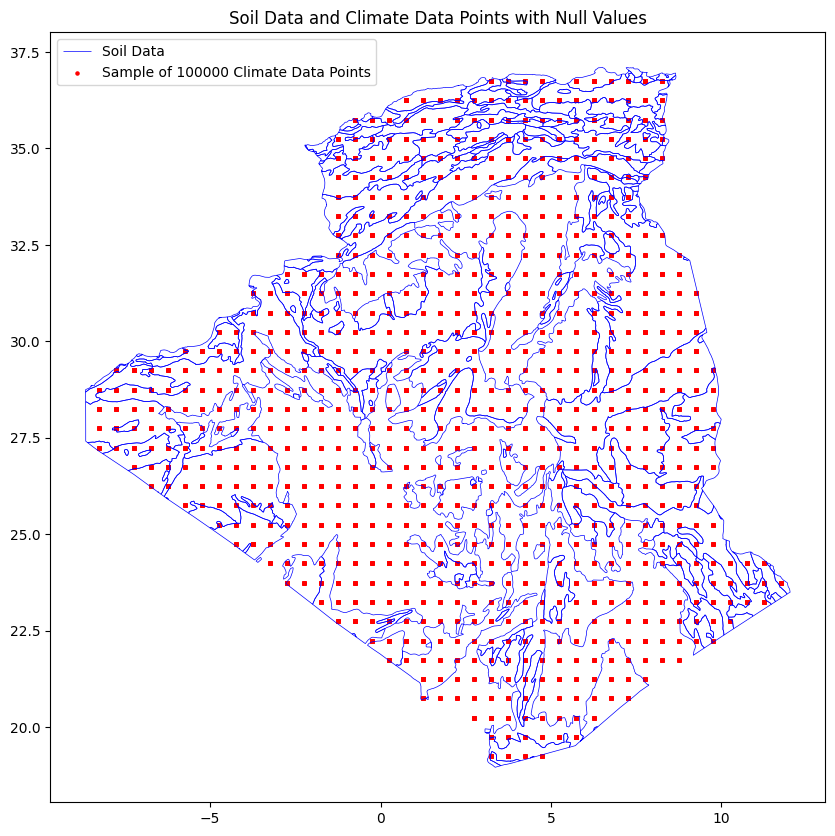

In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
#import itertools


sample_size = 100000  
gdf_climate_sample = gdf_climate.dropna(subset=['Tair', 'Qair', 'Rainf', 'Wind', 'PSurf', 'Snowf']).sample(n=sample_size, random_state=1)

# Convert valid sample points and null points to GeoSeries for plotting
coordinates_sample = [Point(coord) for coord in zip(gdf_climate_sample['lon'], gdf_climate_sample['lat'])]
points_gs_sample = gpd.GeoSeries(coordinates_sample, crs="EPSG:4326")



# Step 3: Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the soil data boundary
soil_gdf.boundary.plot(ax=ax, color='blue', linewidth=0.5, label='Soil Data')

# Plot sampled climate data points (valid data points)
points_gs_sample.plot(ax=ax, color='red', markersize=5, label=f'Sample of {sample_size} Climate Data Points')

# Add title and legend
plt.legend()
plt.title("Soil Data and Climate Data Points")
plt.show()


In [16]:
print(gdf_climate.head())
print(soil_gdf.head())

        time   lon    lat  spatial_ref  PSurf  Qair  Rainf  Snowf  Tair  Wind  \
0 2019-01-01 -8.25  19.25            0    NaN   NaN    NaN    NaN   NaN   NaN   
1 2019-01-01 -8.25  19.75            0    NaN   NaN    NaN    NaN   NaN   NaN   
2 2019-01-01 -8.25  20.25            0    NaN   NaN    NaN    NaN   NaN   NaN   
3 2019-01-01 -8.25  20.75            0    NaN   NaN    NaN    NaN   NaN   NaN   
4 2019-01-01 -8.25  21.25            0    NaN   NaN    NaN    NaN   NaN   NaN   

              geometry  
0  POINT (-8.25 19.25)  
1  POINT (-8.25 19.75)  
2  POINT (-8.25 20.25)  
3  POINT (-8.25 20.75)  
4  POINT (-8.25 21.25)  
  CNT_FULLNAME  sand % topsoil  sand % subsoil  silt % topsoil  silt% subsoil  \
0      ALGERIA           49.57           43.09          28.200         24.200   
1      ALGERIA           56.97           55.06          21.440         19.190   
2      ALGERIA           57.39           55.21          24.315         22.825   
3      ALGERIA           20.41         

In [17]:
df_climate.to_csv("final_climate_data.csv", index=False)

gdf_climate.to_file("final_climate_data.gpkg", driver="GPKG")

soil_gdf.to_file("soil_data.gpkg", driver="GPKG")

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


Calculating diffrent tendecies and qurtiles , ploting histograms and box plots 

In [2]:
import numpy as np 

In [3]:
def median(column_values):
    
    sorted_values = sorted(column_values) 

  
    n = len(sorted_values)
   
    if n % 2 == 1:
        median = sorted_values[n // 2]

    else:
        mid1 = sorted_values[n // 2 - 1]
        mid2 = sorted_values[n // 2]
        median = (mid1 + mid2) / 2
    
    return median

In [4]:
def mode(df, attribute):
    # Drop NaN values
    values = df[attribute].dropna()
    
    # Dictionary to store the frequency of each value
    frequency_dict = {}
    
    # Iterate over the values and count frequencies
    for value in values:
        if value in frequency_dict:
            frequency_dict[value] += 1
        else:
            frequency_dict[value] = 1
    
    # Find the maximum frequency
    max_count = max(frequency_dict.values())
    
    # Collect all values that have the maximum frequency
    most_frequent_values = [value for value, count in frequency_dict.items() if count == max_count]
    
    return most_frequent_values

In [5]:
def calculate_tendencies(df, attribute):

    attribute_values = pd.to_numeric(df[attribute], errors='coerce').dropna()

    if np.issubdtype(attribute_values.dtype, np.number):

        return [attribute_values.mean(),median(attribute_values),mode(df,attribute)]
    else:

        return mode(df,attribute)

In [6]:
def outliers(df, attribute):
    
    # Drop NaN values
    values =  pd.to_numeric(df[attribute], errors='coerce').dropna()

    sorted_values = sorted(values) 

    Q1 = np.percentile(sorted_values, 25)

    Q3 = np.percentile(sorted_values, 75)

    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[attribute] < lower_bound) | (df[attribute] > upper_bound)]

    return [Q1, Q3, IQR, outliers]

In [7]:
def missing_unique_values(df, attribute):
    total_missing = df[attribute].isna().sum()
    unique_values = df[attribute].nunique()
    return total_missing, unique_values

In [ ]:
def histogram(attribute_name, attribute_values, ax=None, bins=20, color='teal', marker='o', line_style='-', marker_size=5, save_folder=None):
   
    cleaned_values = attribute_values[~pd.isna(attribute_values)]
    counts, bin_edges = np.histogram(cleaned_values, bins=bins)

   
    ax.plot(bin_edges[:-1], counts, marker=marker, linestyle=line_style, color=color, markersize=marker_size)
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f"{attribute_name} Histogram", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

   
    if save_folder:
        fig_save, ax_save = plt.subplots(figsize=(5, 3))  
        ax_save.plot(bin_edges[:-1], counts, marker=marker, linestyle=line_style, color=color, markersize=marker_size)
        ax_save.set_xlabel('Values', fontsize=10)
        ax_save.set_ylabel('Frequency', fontsize=10)
        ax_save.set_title(f"{attribute_name} Histogram", fontsize=12)
        ax_save.grid(True, linestyle='--', alpha=0.6)

        
        safe_attribute_name = attribute_name.replace("/", "_")
        save_path = os.path.join(save_folder, f"{safe_attribute_name}_histogram.png")
        fig_save.savefig(save_path, format='png', dpi=300)
        plt.close(fig_save)

In [39]:
def generate_box_plot(data, attribute_name, ax=None, show_outliers=True, save_folder=None):
    # Remove NaN values from the data
    cleaned_data = data.dropna()

    
    cleaned_data = np.array(cleaned_data)

    # Create the main figure and axes for the box plot
    
    fig_save, ax_save = plt.subplots(figsize=(5, 3))  # For saving the figure

    # Generate the box plot for display
    if show_outliers:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name], showfliers=False)

    # Set the title and display grid for the notebook plot
    ax.set_title(f'Box Plot for {attribute_name}')
    ax.grid(True)

    # Generate the box plot for saving
    if show_outliers:
        ax_save.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        ax_save.boxplot(cleaned_data, vert=False, patch_artist=True, labels=[attribute_name], showfliers=False)

    # Set the title and display grid for the saved plot
    ax_save.set_title(f'Box Plot for {attribute_name}')
    ax_save.grid(True)

    if save_folder:
        safe_attribute_name = attribute_name.replace("/", "_")  # Replace "/" with "_" for filename
        save_path = os.path.join(save_folder, f"{safe_attribute_name}_box_plot.png")
        fig_save.savefig(save_path, format='png', dpi=300)
        plt.close(fig_save)  # Close the save figure to free up memory



In [30]:
def bar_chart(attribute_name, attribute_values, ax=None, bins=20, color='teal', edgecolor='k', save_folder=None):
    # Clean the values, remove NaNs
    cleaned_values = attribute_values[~pd.isna(attribute_values)]
    
    # Plot the histogram (bar chart)
    ax.hist(cleaned_values, bins=bins, edgecolor=edgecolor, color=color, alpha=0.75)
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f"{attribute_name} Bar Chart", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Save the figure if save_folder is specified
    if save_folder:
        fig_save, ax_save = plt.subplots(figsize=(5, 3))  
        ax_save.hist(cleaned_values, bins=bins, edgecolor=edgecolor, color=color, alpha=0.75)
        ax_save.set_xlabel('Values', fontsize=10)
        ax_save.set_ylabel('Frequency', fontsize=10)
        ax_save.set_title(f"{attribute_name} Bar Chart", fontsize=12)
        ax_save.grid(True, linestyle='--', alpha=0.6)

        # Create safe filename
        safe_attribute_name = attribute_name.replace("/", "_")
        save_path = os.path.join(save_folder, f"{safe_attribute_name}_bar_chart.png")
        fig_save.savefig(save_path, format='png', dpi=300)
        plt.close(fig_save)

In [11]:
import geopandas as gpd
soil_gdf = gpd.read_file("soil_data.gpkg")  
climate_gdf = gpd.read_file("final_climate_data.gpkg")

In [3]:
print(climate_gdf.shape[0])
print(soil_gdf.shape[0])

12929760
291


In [15]:

soil_numerical_cols = soil_gdf.select_dtypes(include=[np.number]).columns
soil_non_numerical_cols = soil_gdf.select_dtypes(exclude=[np.number]).columns
print(soil_numerical_cols)
print(soil_non_numerical_cols)

Index(['sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
       'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
       'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
       'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
       'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
       'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
       'C/N topsoil', 'C/N subsoil'],
      dtype='object')
Index(['CNT_FULLNAME', 'geometry'], dtype='object')


In [16]:
import pandas as pd

# Initialize a list to store results
results = []

# List of attributes
attributes = [
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil'
]

# Iterate over each attribute
for attribute in attributes:
    # Calculate tendencies (mean, median, mode)
    tendencies = calculate_tendencies(soil_gdf, attribute)
    mean_val = tendencies[0]
    median_val = tendencies[1]
    mode_val = tendencies[2]
    
    # Calculate outliers (Q1, Q3, IQR, presence of outliers)
    outliers_data = outliers(soil_gdf, attribute)
    Q1, Q3, IQR, outliers_df = outliers_data
    has_outliers = not outliers_df.empty
    
    # Calculate missing and unique values
    missing_vals, unique_vals = missing_unique_values(soil_gdf, attribute)
    
    # Append results for this attribute to the list
    results.append({
        "Attribute": attribute,
        "Mean": mean_val,
        "Median": median_val,
        "Mode": ', '.join(map(str, mode_val)) if isinstance(mode_val, list) else mode_val,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Has Outliers": "Yes" if has_outliers else "No",
        "Missing Values": missing_vals,
        "Unique Values": unique_vals
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("soil_attributes_summary.csv", index=False, sep=';')
print("Results saved to soil_attributes_summary.csv")

#visualize the results
results_df


Results saved to soil_attributes_summary.csv


,Attribute,Mean,Median,Mode,Q1,Q3,IQR,Has Outliers,Missing Values,Unique Values
0,sand % topsoil,32.935423,36.0900,0.0,0.0,50.390,50.390,No,0,97
1,sand % subsoil,32.054615,36.4900,0.0,0.0,46.550,46.550,No,0,96
2,silt % topsoil,18.081759,18.5460,0.0,0.0,26.220,26.220,No,0,98
3,silt% subsoil,17.972852,19.1000,0.0,0.0,27.900,27.900,No,0,98
4,clay % topsoil,18.263509,22.7600,0.0,0.0,25.200,25.200,No,0,95
5,clay % subsoil,19.149845,22.3200,0.0,0.0,27.240,27.240,No,0,94
6,pH water topsoil,5.253718,7.3000,0.0,0.0,7.705,7.705,No,0,79
7,pH water subsoil,5.340416,7.4600,0.0,0.0,7.810,7.810,No,0,84
8,OC % topsoil,0.439228,0.4475,0.0,0.0,0.678,0.678,Yes,0,96
9,OC % subsoil,0.253943,0.2870,0.0,0.0,0.400,0.400,No,0,87


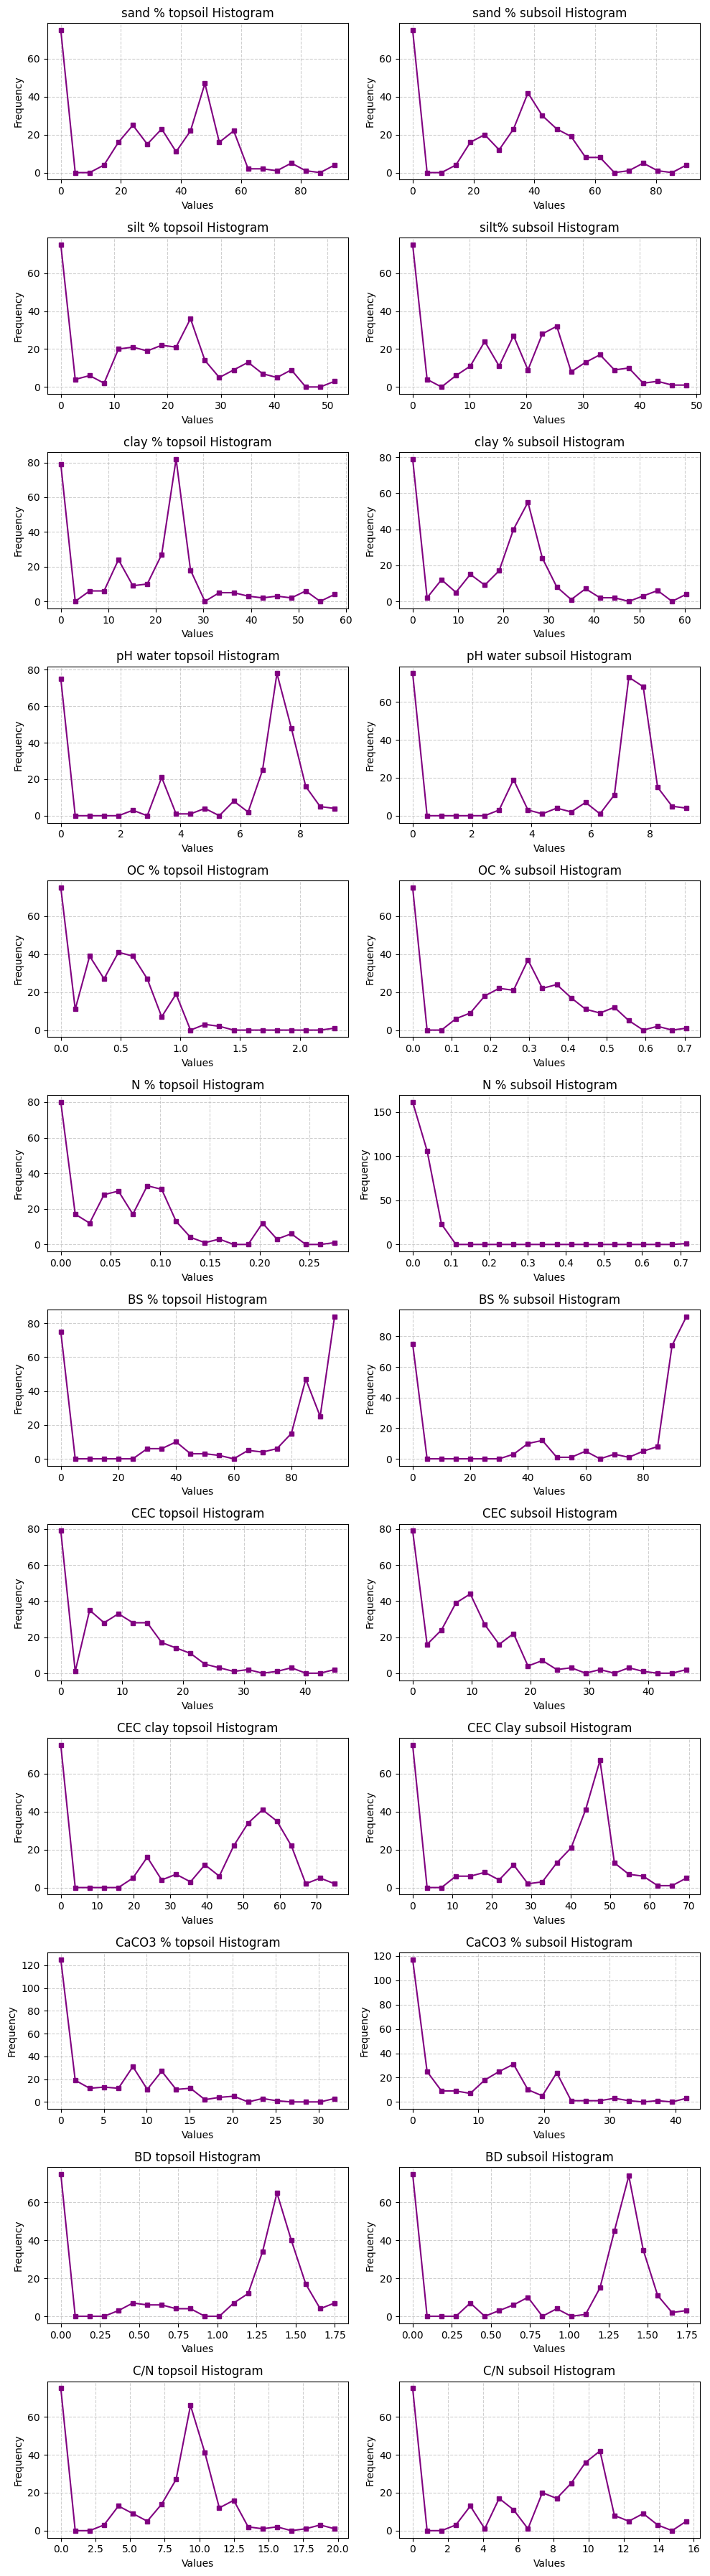

In [22]:
import os


attributes = [
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil'
]

num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "histograms"
os.makedirs(output_folder, exist_ok=True)


for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols

    histogram(attribute, soil_gdf[attribute].values, ax=axes[row, col], bins=20, color='purple', marker='s', line_style='-', marker_size=4, save_folder=output_folder)

plt.tight_layout()
plt.show()

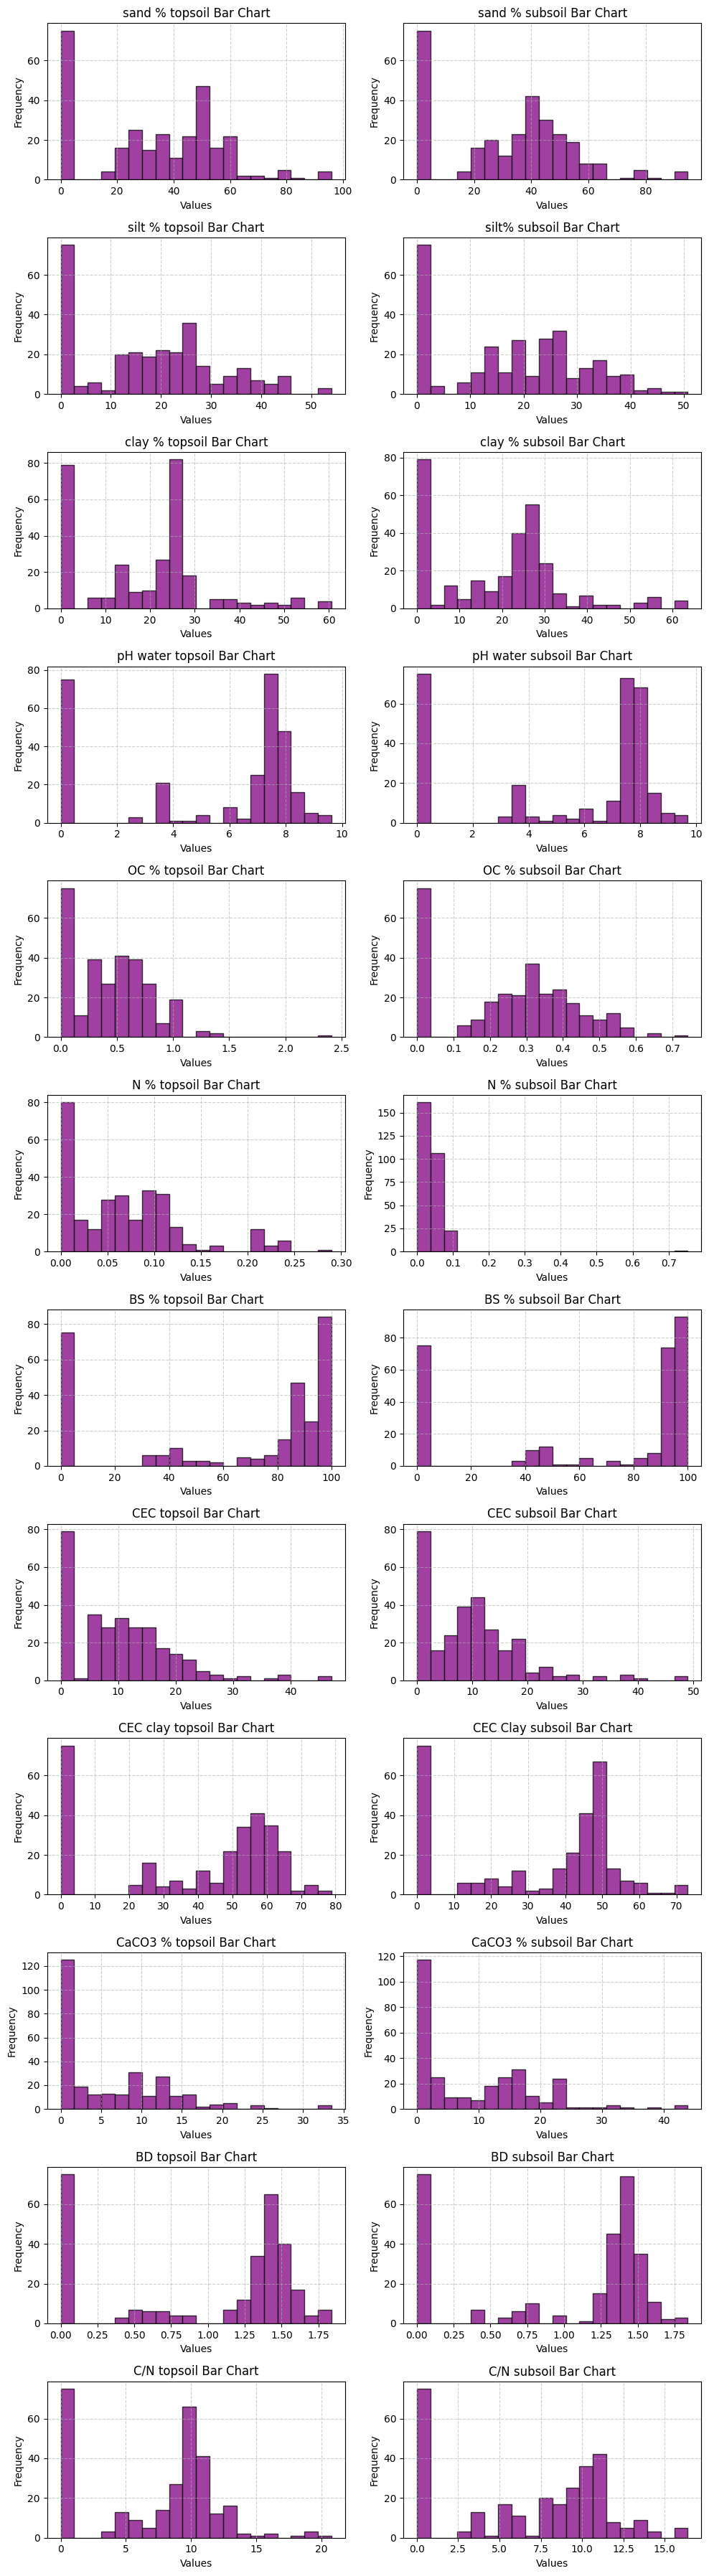

In [38]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "barcharts"
os.makedirs(output_folder, exist_ok=True)

# Generate bar charts for each attribute
for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols

    # Display the bar chart in the grid
    bar_chart(attribute, soil_gdf[attribute].values, ax=axes[row, col], bins=20, color='purple', edgecolor='k', save_folder=output_folder)

plt.tight_layout()
plt.show()

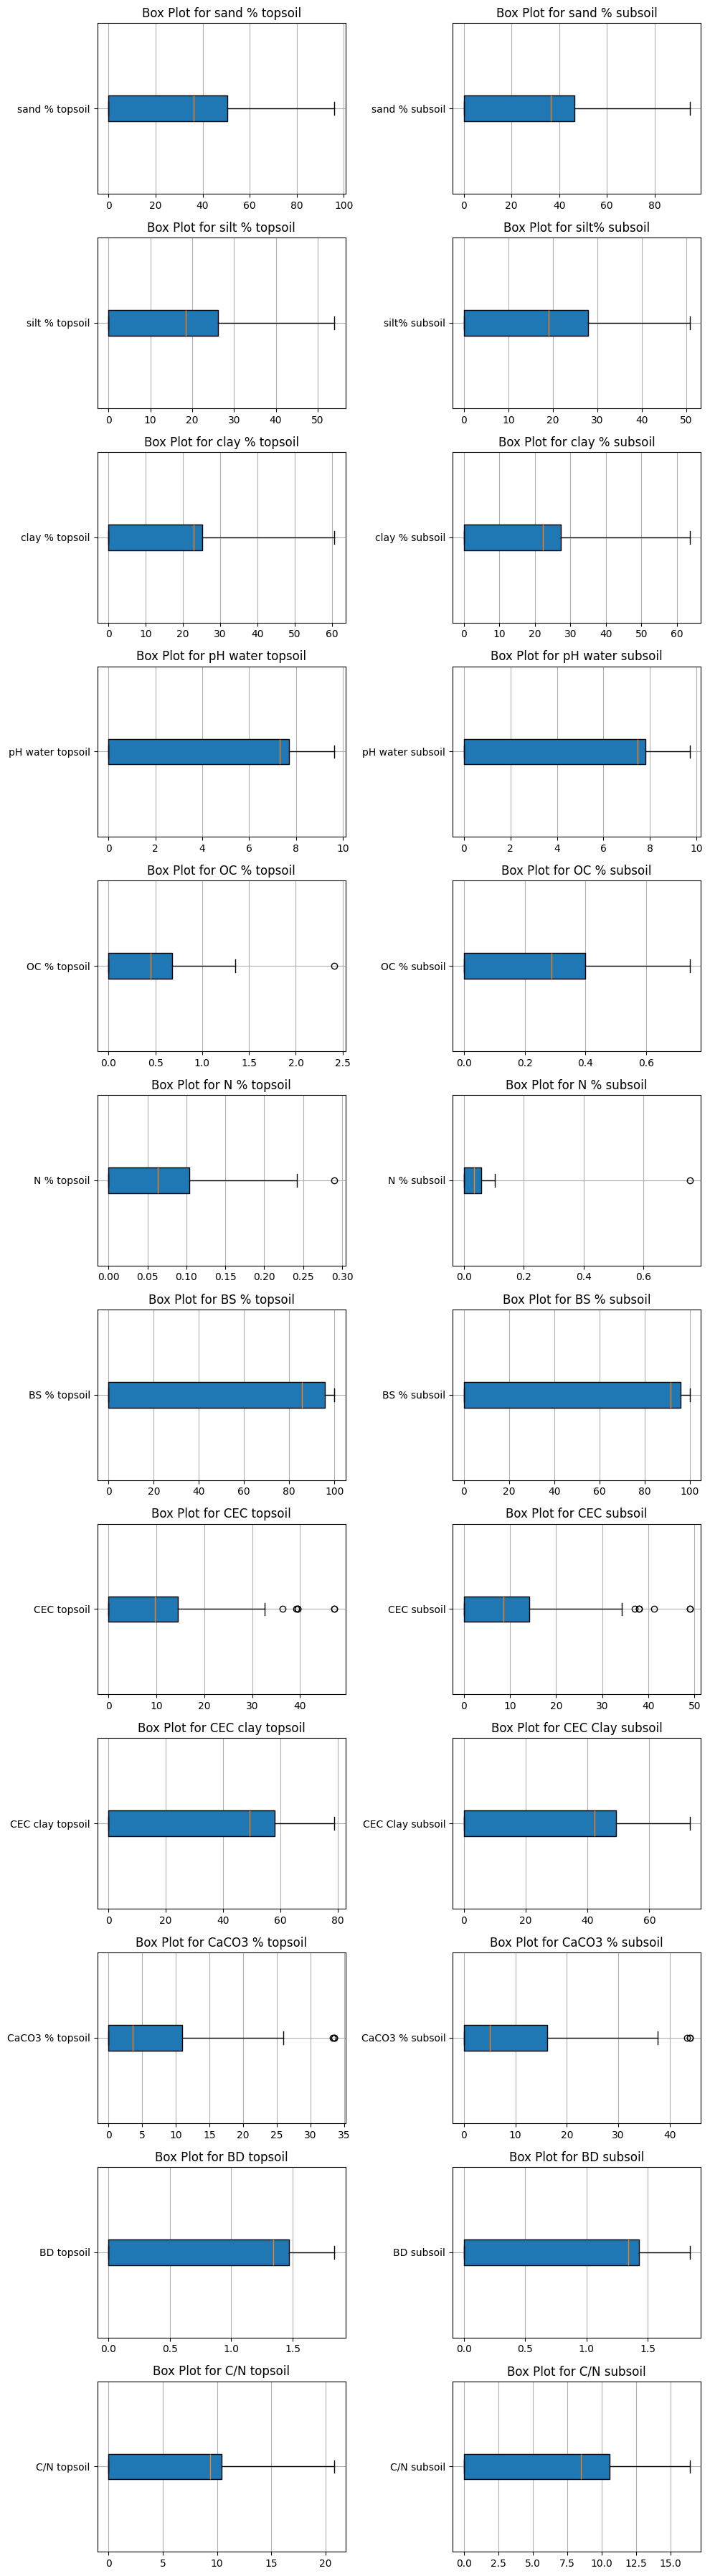

In [40]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "boxplots"
os.makedirs(output_folder, exist_ok=True)


for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols
    generate_box_plot(soil_gdf[attribute], attribute, ax=axes[row, col], show_outliers=True, save_folder=output_folder)

plt.tight_layout()
plt.show()

Climate attributes

In [41]:
climate_numerical_cols = climate_gdf.select_dtypes(include=[np.number]).columns
climate_non_numerical_cols = climate_gdf.select_dtypes(exclude=[np.number]).columns
print(climate_numerical_cols)
print(climate_non_numerical_cols)

Index(['lon', 'lat', 'spatial_ref', 'PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair',
       'Wind'],
      dtype='object')
Index(['time', 'geometry'], dtype='object')


In [43]:

results = []

# List of attributes
attributes = ['lon', 'lat', 'PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind']

# Iterate over each attribute
for attribute in attributes:
    # Calculate tendencies (mean, median, mode)
    tendencies = calculate_tendencies(climate_gdf, attribute)
    mean_val = tendencies[0]
    median_val = tendencies[1]
    mode_val = tendencies[2]
    
    # Calculate outliers (Q1, Q3, IQR, presence of outliers)
    outliers_data = outliers(climate_gdf, attribute)
    Q1, Q3, IQR, outliers_df = outliers_data
    has_outliers = not outliers_df.empty
    
    # Calculate missing and unique values
    missing_vals, unique_vals = missing_unique_values(climate_gdf, attribute)
    
    # Append results for this attribute to the list
    results.append({
        "Attribute": attribute,
        "Mean": mean_val,
        "Median": median_val,
        "Mode": ', '.join(map(str, mode_val)) if isinstance(mode_val, list) else mode_val,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Has Outliers": "Yes" if has_outliers else "No",
        "Missing Values": missing_vals,
        "Unique Values": unique_vals
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("climate_attributes_summary.csv", index=False, sep=';')
print("Results saved to climate_attributes_summary.csv")

results_df

Results saved to climate_attributes_summary.csv


,Attribute,Mean,Median,Mode,Q1,Q3,IQR,Has Outliers,Missing Values,Unique Values
0,lon,1.750000e+00,1.750000,"-8.25, -7.75, -7.25, -6.75, -6.25, -5.75, -5.2...",-3.250000,6.750000,10.000000,No,0,41
1,lat,2.800000e+01,28.000000,"19.25, 19.75, 20.25, 20.75, 21.25, 21.75, 22.2...",23.625000,32.375000,8.750000,No,0,36
2,PSurf,9.487716e+04,95569.117188,97212.2578125,93079.195312,97283.812500,4204.617188,Yes,5431200,1770194
3,Qair,4.690343e-03,0.004132,"0.003966310992836952, 0.004317568149417639",0.002996,0.005816,0.002820,Yes,5431200,6075571
4,Rainf,2.350112e-06,0.000000,0.0,0.000000,0.000000,0.000000,Yes,5431200,144365
5,Snowf,3.864786e-08,0.000000,0.0,0.000000,0.000000,0.000000,Yes,5431200,3812
6,Tair,2.964559e+02,296.686310,300.2471923828125,288.702972,303.969948,15.266975,Yes,5431200,1418678
7,Wind,4.043839e+00,3.779118,4.110576152801514,2.645402,5.162067,2.516665,Yes,5431200,6312312


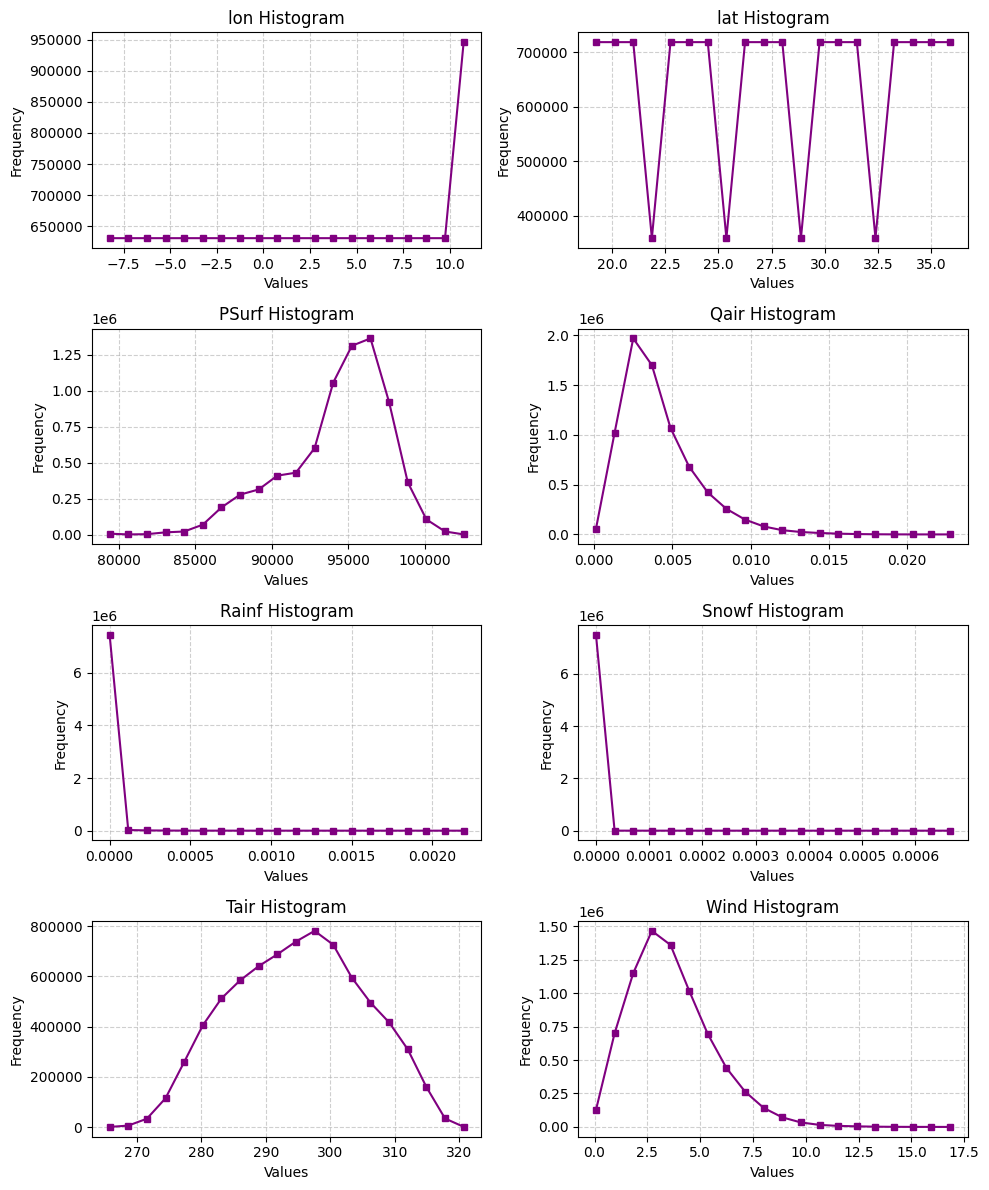

In [44]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "histograms"
os.makedirs(output_folder, exist_ok=True)


for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols

    histogram(attribute, climate_gdf[attribute].values, ax=axes[row, col], bins=20, color='purple', marker='s', line_style='-', marker_size=4, save_folder=output_folder)

plt.tight_layout()
plt.show()

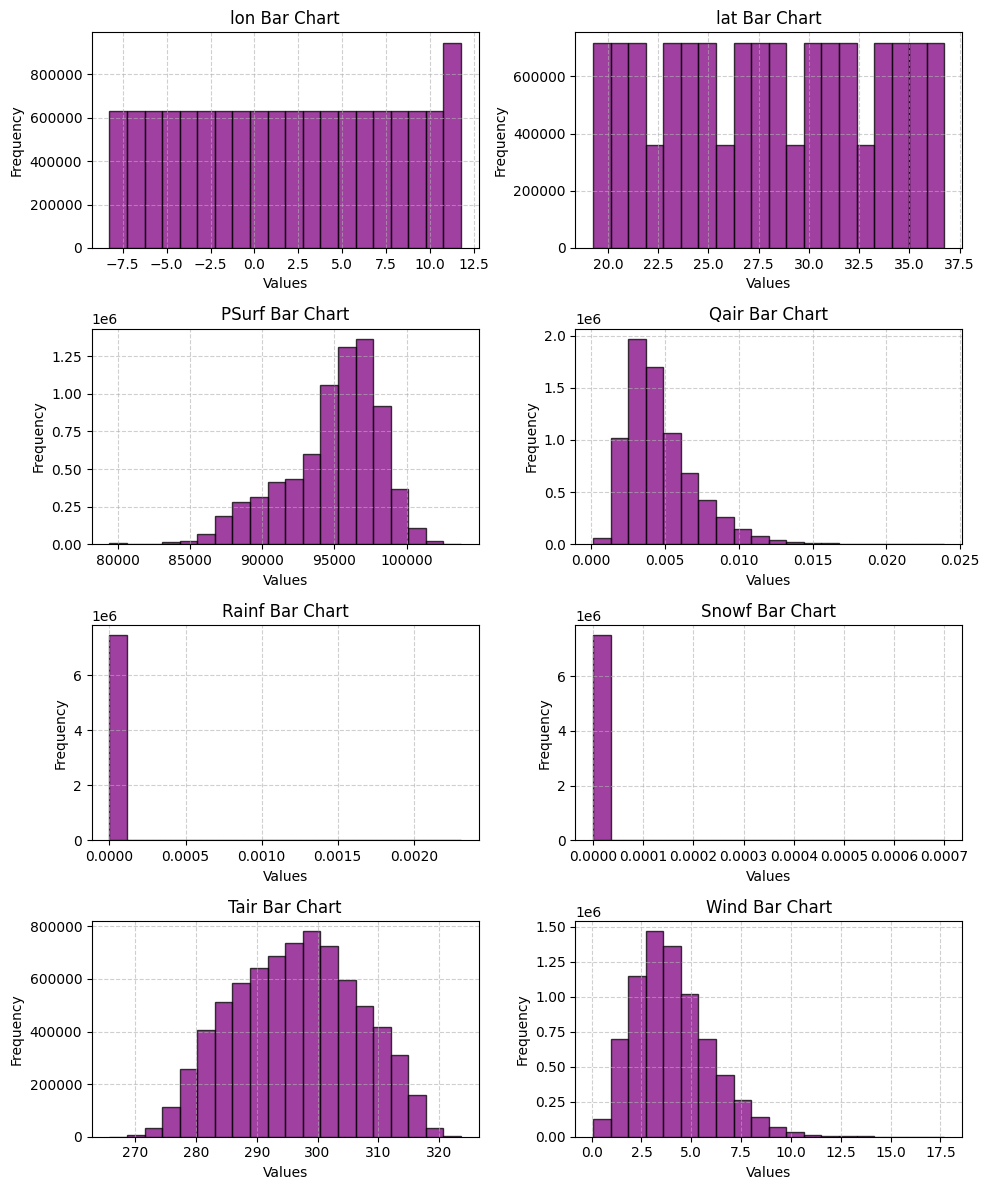

In [45]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "barcharts"
os.makedirs(output_folder, exist_ok=True)

# Generate bar charts for each attribute
for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols

    # Display the bar chart in the grid
    bar_chart(attribute, climate_gdf[attribute].values, ax=axes[row, col], bins=20, color='purple', edgecolor='k', save_folder=output_folder)

plt.tight_layout()
plt.show()

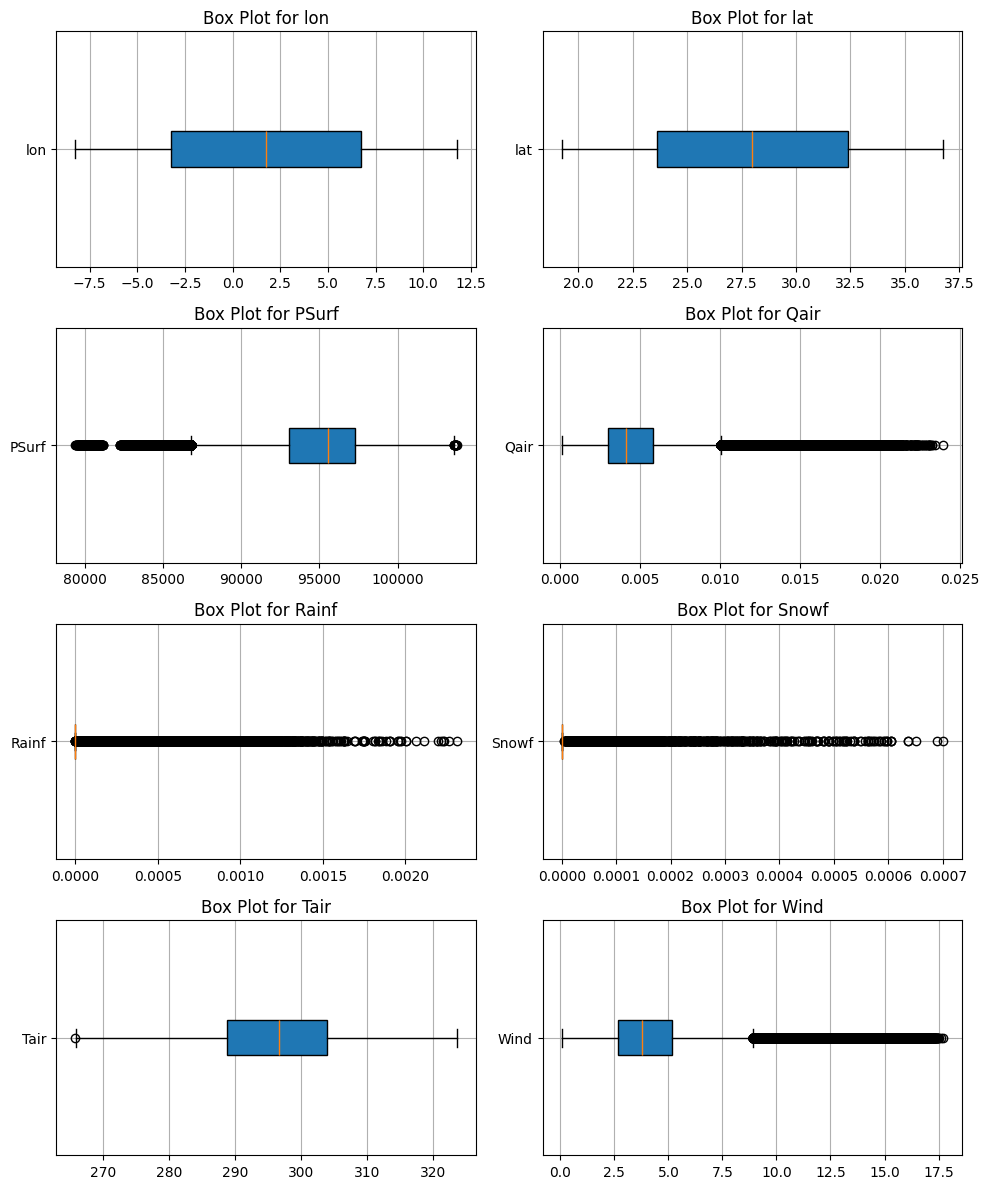

In [46]:
num_cols = 2  
num_rows = (len(attributes) + 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))

output_folder = "boxplots"
os.makedirs(output_folder, exist_ok=True)


for i, attribute in enumerate(attributes):
    row = i // num_cols
    col = i % num_cols
    generate_box_plot(climate_gdf[attribute], attribute, ax=axes[row, col], show_outliers=True, save_folder=output_folder)

plt.tight_layout()
plt.show()

Data integration , Data reduction , Normalization  and Discretization 

In [7]:
def data_integration(soil_gdf,climate_gdf):

    merged_gdf = gpd.sjoin(climate_gdf, soil_gdf, how="inner", predicate="within")

    return merged_gdf

In [8]:
def data_reduction(df, climate_attributes):
    climate_attributes = [attr for attr in climate_attributes if attr not in ['lon', 'lat']]

    df['time'] = pd.to_datetime(df['time'])
    df['month'] = df['time'].dt.month
    df['season'] = df['month'].apply(lambda x: (
        'winter' if x in [12, 1, 2] else
        'spring' if x in [3, 4, 5] else
        'summer' if x in [6, 7, 8] else
        'autumn'
    ))

    df['lon'] = df['lon'].round(3)
    df['lat'] = df['lat'].round(3)

    grouped = df.groupby(['season', 'lon', 'lat'])[climate_attributes].mean()
    seasonally_aggregated_df = grouped.unstack(level=0)
    seasonally_aggregated_df.columns = [
        f"{col}_{season}" for season, col in seasonally_aggregated_df.columns
    ]
    seasonally_aggregated_df = seasonally_aggregated_df.reset_index()

    
    gdf = gpd.GeoDataFrame(
        seasonally_aggregated_df,
        geometry=gpd.points_from_xy(seasonally_aggregated_df['lon'], seasonally_aggregated_df['lat']),
        crs=df.crs  
    )

    return gdf


In [9]:
'''used for soil data'''

def handle_soil_outliers(df, columns, strategy='mean', iqr_multiplier=1.5):
    df_cleaned = df.copy()
    for column_name in columns:
        if df_cleaned[column_name].dtype not in ['float64', 'int64']:
            continue

        
        column_data = df_cleaned[column_name].fillna(df_cleaned[column_name].median())  
        
       
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - iqr_multiplier * iqr
        upper_bound = q3 + iqr_multiplier * iqr

        
        outliers = (column_data < lower_bound) | (column_data > upper_bound)
        num_outliers = outliers.sum()
        print(f"{column_name}: {num_outliers} outliers detected.")

        if strategy == 'mean':
            replacement_value = np.float64(column_data.mean())
        elif strategy == 'median':
            replacement_value = np.float64(column_data.median())
        elif strategy == 'mode':
            replacement_value = np.float64(column_data.mode()[0] )
        elif strategy == 'quantile':
           
            df_cleaned.loc[column_data < lower_bound, column_name] = q1
            df_cleaned.loc[column_data > upper_bound, column_name] = q3
            continue  
        elif strategy == 'cap':
           
            df_cleaned.loc[column_data < lower_bound, column_name] = lower_bound
            df_cleaned.loc[column_data > upper_bound, column_name] = upper_bound
            continue
        elif strategy == 'random':
           
            random_values = np.random.uniform(q1, q3, size=num_outliers).astype('float64')
            df_cleaned.loc[outliers & ~df_cleaned[column_name].isna(), column_name] = random_values
            remaining_outliers = ((df_cleaned[column_name] < lower_bound) | (df_cleaned[column_name] > upper_bound)).sum()
            print(f"{column_name}: Outliers after handling: {remaining_outliers}")
            continue
            
        else:
            raise ValueError("Invalid strategy. Choose from 'mean', 'median', 'mode', 'quantile', 'cap', or 'random'.")

      
        df_cleaned.loc[outliers & ~df_cleaned[column_name].isna(), column_name] = replacement_value
        
         # Double-check remaining outliers
        remaining_outliers = ((df_cleaned[column_name] < lower_bound) | (df_cleaned[column_name] > upper_bound)).sum()
        print(f"{column_name}: Outliers after handling: {remaining_outliers}")

    return df_cleaned





In [10]:
import numpy as np 
'''used for climate data'''

def handle_climate_outliers(df, columns, strategy='mean', iqr_multiplier=1.5):
    df_cleaned = df.copy()

    for column_name in columns:
        # Check for numeric types, including float32 and float64
        if df_cleaned[column_name].dtype not in ['float64', 'float32', 'int64']:
            continue
        
        column_data = df_cleaned[column_name].dropna()

        # Calculate IQR and bounds
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - iqr_multiplier * iqr
        upper_bound = q3 + iqr_multiplier * iqr

        # Identify outliers
        outliers = (column_data < lower_bound) | (column_data > upper_bound)
        num_outliers = outliers.sum()
        print(f"{column_name}: {num_outliers} outliers detected.")

        # Determine replacement value based on the strategy
        if strategy == 'mean':
            replacement_value = np.float32(column_data.mean())
            df_cleaned.loc[outliers & ~df_cleaned[column_name].isna(), column_name] = replacement_value
        elif strategy == 'median':
            replacement_value = np.float32(column_data.median())
            df_cleaned.loc[outliers & ~df_cleaned[column_name].isna(), column_name] = replacement_value
        elif strategy == 'mode':
            replacement_value = np.float32(column_data.mode()[0])
            df_cleaned.loc[outliers & ~df_cleaned[column_name].isna(), column_name] = replacement_value
        elif strategy == 'quantile':
            df_cleaned.loc[column_data < lower_bound, column_name] = np.float32(q1)
            df_cleaned.loc[column_data > upper_bound, column_name] = np.float32(q3)
            continue
        elif strategy == 'cap':
            df_cleaned.loc[column_data < lower_bound, column_name] = lower_bound
            df_cleaned.loc[column_data > upper_bound, column_name] = upper_bound
            continue
        elif strategy == 'random':
            # Generate a random value for each outlier
            random_values = np.random.uniform(q1, q3, size=num_outliers).astype('float32')
            df_cleaned.loc[outliers & ~df_cleaned[column_name].isna(), column_name] = random_values
            continue
        else:
            raise ValueError("Invalid strategy. Choose from 'mean', 'median', 'mode', 'quantile', 'cap', or 'random'.")

        # Double-check remaining outliers
        remaining_outliers = ((df_cleaned[column_name] < lower_bound) | (df_cleaned[column_name] > upper_bound)).sum()
        print(f"{column_name}: Outliers after handling: {remaining_outliers}")
      
    return df_cleaned



In [11]:
def handling_missing_values(df, attributes, choice):
    updated_df = df.copy()

    match choice:
        case 'Ignore the Nan values':
            updated_df.dropna(axis=0, inplace=True)
            return updated_df
        
        case 'Replace by Mean':
            for attribute in attributes:
                updated_df[attribute] = updated_df[attribute].fillna(updated_df[attribute].mean())
            return updated_df

        case 'Replace by Median':
            for attribute in attributes:
                updated_df[attribute] = updated_df[attribute].fillna(updated_df[attribute].median())
            return updated_df
        
        case 'Replace using Bayes Formula':
            for attribute in attributes:
                
                if attribute in updated_df.columns:
                    
                    overall_mean = updated_df[attribute].mean()
                    overall_std = updated_df[attribute].std()

                    
                    nan_indices = updated_df[updated_df[attribute].isna()].index
                    
                    
                    updated_df.loc[nan_indices, attribute] = np.random.normal(loc=overall_mean, scale=overall_std, size=len(nan_indices))

            return updated_df



In [12]:
def min_max_normalization(df, attributes, epsilon=1e-6): 
    for attribute in attributes:
        min_value = df[attribute].dropna().min()
        max_value = df[attribute].dropna().max()
        range_value = max_value - min_value + epsilon  

        if max_value != min_value: 
            df[attribute] = (df[attribute] - min_value) / range_value
        else:
            df[attribute] = df[attribute]  # No change for constant columns
    
    return df


In [13]:
def z_score_normalization(df, attributes):
    normalized_df = df.copy() 

    for attribute in attributes:
        mean_value = df[attribute].mean()
        std_dev = df[attribute].std()  
        
        if std_dev == 0:
            normalized_df[attribute] = normalized_df[attribute]  
        else:
            normalized_df[attribute] = (df[attribute] - mean_value) / std_dev
    
    return normalized_df

In [14]:
from sklearn.feature_selection import VarianceThreshold

def data_reduction_v_h(df,choice):
      
   df_reduced = df.select_dtypes(include=['float64'])

   match choice:
        case 'Horizontal':
            df_reduced = df_reduced.drop_duplicates()
            return df_reduced
        
        case 'Low Variance Columns':
                       
            selector = VarianceThreshold(threshold=0.01)
            reduced_array = selector.fit_transform(df_reduced)
            df_reduced = pd.DataFrame(reduced_array, columns=df_reduced.columns[selector.get_support()])
            return df_reduced
         
        
        case 'Correlation-Based Removal':
           correlation_matrix = df_reduced.corr().abs()
           upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
           
           columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
           df_reduced = df_reduced.drop(columns=columns_to_drop)
           return df_reduced

       
     

In [2]:
import geopandas as gpd
soil_gdf = gpd.read_file("soil_data.gpkg")  
climate_gdf = gpd.read_file("final_climate_data.gpkg")


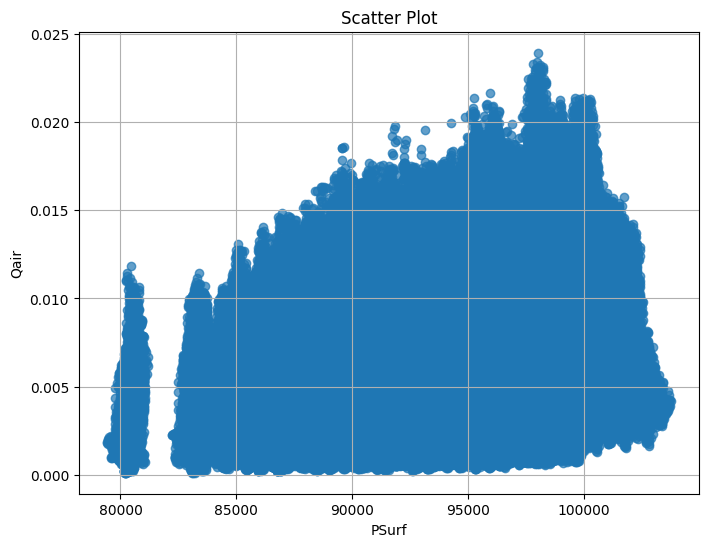

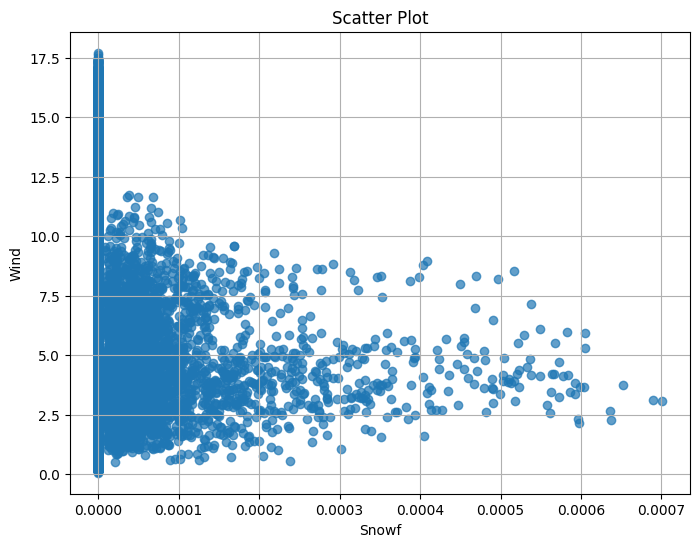

In [3]:
def scatter_plot(attribute_name_x, attribute_name_y, attribute_values_x, attribute_values_y):
    """
    Generate and display a scatter plot for the given attributes and their values.
    """
    plt.figure(figsize=(8, 6))
    plt.title("Scatter Plot")
    plt.xlabel(attribute_name_x)
    plt.ylabel(attribute_name_y)
    plt.scatter(attribute_values_x, attribute_values_y, alpha=0.7)
    plt.grid(True)
    plt.show() 

scatter_plot("PSurf","Qair",climate_gdf["PSurf"],climate_gdf["Qair"])
scatter_plot("Snowf","Wind",climate_gdf["Snowf"],climate_gdf["Wind"])

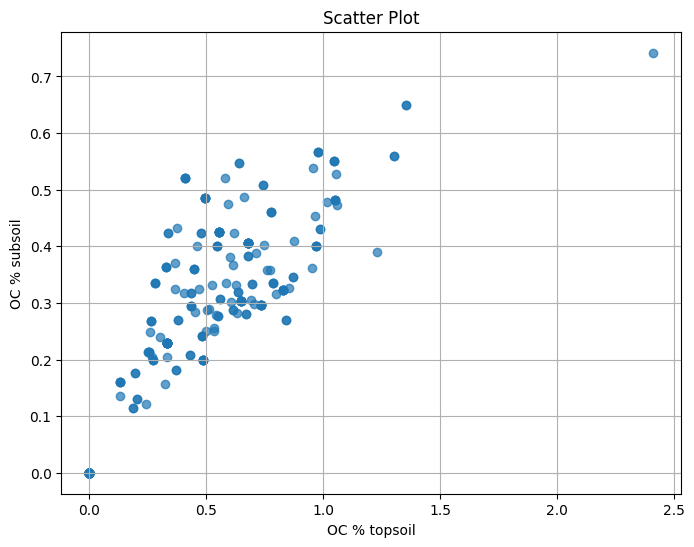

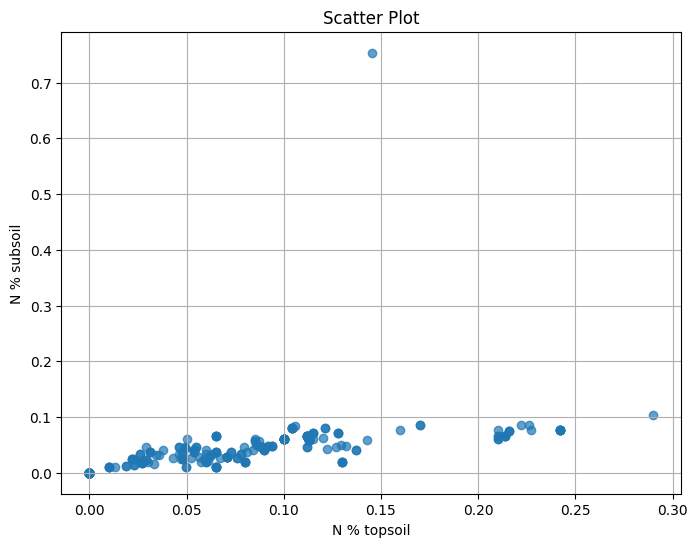

In [4]:
scatter_plot("OC % topsoil","OC % subsoil",soil_gdf["OC % topsoil"],soil_gdf["OC % subsoil"])
scatter_plot("N % topsoil","N % subsoil",soil_gdf["N % topsoil"],soil_gdf["N % subsoil"])

In [5]:
print(soil_gdf.shape[0])
print(climate_gdf.shape[0])

291
12929760


Data cleaning

In [5]:
soil_attributes = ['sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil']

soil_attributes_with_outliers = ['OC % topsoil', 'N % topsoil' ,'N % subsoil','CEC topsoil' ,'CEC subsoil', 'CaCO3 % topsoil','CaCO3 % subsoil']

climate_attributes = ['PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind', 'lon', 'lat']

climate_attributes_with_outliers = ['PSurf', 'Qair', 'Rainf', 'Snowf', 'Tair', 'Wind']

Handling outliers

In [ ]:
# handling ouutliers for soil attributes

In [28]:
mean_cleaned_outliers_soil_gdf = handle_soil_outliers(soil_gdf, soil_attributes_with_outliers, strategy='mean')


OC % topsoil: 1 outliers detected.
OC % topsoil: Outliers after handling: 0
N % topsoil: 1 outliers detected.
N % topsoil: Outliers after handling: 0
N % subsoil: 1 outliers detected.
N % subsoil: Outliers after handling: 0
CEC topsoil: 6 outliers detected.
CEC topsoil: Outliers after handling: 0
CEC subsoil: 6 outliers detected.
CEC subsoil: Outliers after handling: 0
CaCO3 % topsoil: 3 outliers detected.
CaCO3 % topsoil: Outliers after handling: 0
CaCO3 % subsoil: 3 outliers detected.
CaCO3 % subsoil: Outliers after handling: 0


In [29]:
mode_cleaned_outliers_soil_gdf = handle_soil_outliers(soil_gdf, soil_attributes_with_outliers, strategy='mode')


OC % topsoil: 1 outliers detected.
OC % topsoil: Outliers after handling: 0
N % topsoil: 1 outliers detected.
N % topsoil: Outliers after handling: 0
N % subsoil: 1 outliers detected.
N % subsoil: Outliers after handling: 0
CEC topsoil: 6 outliers detected.
CEC topsoil: Outliers after handling: 0
CEC subsoil: 6 outliers detected.
CEC subsoil: Outliers after handling: 0
CaCO3 % topsoil: 3 outliers detected.
CaCO3 % topsoil: Outliers after handling: 0
CaCO3 % subsoil: 3 outliers detected.
CaCO3 % subsoil: Outliers after handling: 0


In [15]:
median_cleaned_outliers_soil_gdf = handle_soil_outliers(soil_gdf, soil_attributes_with_outliers, strategy='median')


OC % topsoil: 1 outliers detected.
OC % topsoil: Outliers after handling: 0
N % topsoil: 1 outliers detected.
N % topsoil: Outliers after handling: 0
N % subsoil: 1 outliers detected.
N % subsoil: Outliers after handling: 0
CEC topsoil: 6 outliers detected.
CEC topsoil: Outliers after handling: 0
CEC subsoil: 6 outliers detected.
CEC subsoil: Outliers after handling: 0
CaCO3 % topsoil: 3 outliers detected.
CaCO3 % topsoil: Outliers after handling: 0
CaCO3 % subsoil: 3 outliers detected.
CaCO3 % subsoil: Outliers after handling: 0


In [ ]:
quantile_cleaned_outliers_soil_gdf = handle_soil_outliers(soil_gdf, soil_attributes_with_outliers, strategy='quantile')


In [ ]:
cap_cleaned_outliers_soil_gdf = handle_soil_outliers(soil_gdf, soil_attributes_with_outliers, strategy='cap')


In [16]:
random_cleaned_outliers_soil_gdf = handle_soil_outliers(soil_gdf, soil_attributes_with_outliers, strategy='random')


OC % topsoil: 1 outliers detected.
OC % topsoil: Outliers after handling: 0
N % topsoil: 1 outliers detected.
N % topsoil: Outliers after handling: 0
N % subsoil: 1 outliers detected.
N % subsoil: Outliers after handling: 0
CEC topsoil: 6 outliers detected.
CEC topsoil: Outliers after handling: 0
CEC subsoil: 6 outliers detected.
CEC subsoil: Outliers after handling: 0
CaCO3 % topsoil: 3 outliers detected.
CaCO3 % topsoil: Outliers after handling: 0
CaCO3 % subsoil: 3 outliers detected.
CaCO3 % subsoil: Outliers after handling: 0


In [ ]:
# handling ouutliers for climate attributes

In [34]:
mean_cleaned_outliers_climate_gdf = handle_climate_outliers(climate_gdf, climate_attributes_with_outliers,strategy='mean')


PSurf: 125547 outliers detected.
PSurf: Outliers after handling: 0
Qair: 264733 outliers detected.
Qair: Outliers after handling: 0
Rainf: 145080 outliers detected.
Rainf: Outliers after handling: 145080
Snowf: 3813 outliers detected.
Snowf: Outliers after handling: 3813
Tair: 1 outliers detected.
Tair: Outliers after handling: 0
Wind: 130202 outliers detected.
Wind: Outliers after handling: 0


In [17]:
median_cleaned_outliers_climate_gdf = handle_climate_outliers(climate_gdf, climate_attributes_with_outliers,strategy='median')


PSurf: 125547 outliers detected.
PSurf: Outliers after handling: 0
Qair: 264733 outliers detected.
Qair: Outliers after handling: 0
Rainf: 145080 outliers detected.
Rainf: Outliers after handling: 0
Snowf: 3813 outliers detected.
Snowf: Outliers after handling: 0
Tair: 1 outliers detected.
Tair: Outliers after handling: 0
Wind: 130202 outliers detected.
Wind: Outliers after handling: 0


In [36]:
random_cleaned_outliers_climate_gdf = handle_climate_outliers(climate_gdf, climate_attributes_with_outliers,strategy='random')

PSurf: 125547 outliers detected.
Qair: 264733 outliers detected.
Rainf: 145080 outliers detected.
Snowf: 3813 outliers detected.
Tair: 1 outliers detected.
Wind: 130202 outliers detected.


In [ ]:
# handling missing values for only climate  attributes because soil has no missing values 

In [37]:
deleted_nan_climate_gdf = handling_missing_values(median_cleaned_outliers_climate_gdf, climate_attributes, 'Ignore the Nan values')
deleted_nan_climate_gdf.shape[0]

7498560

In [18]:
replaced_nan_median_climate_gdf = handling_missing_values(median_cleaned_outliers_climate_gdf, climate_attributes, 'Replace by Median')

In [ ]:
replaced_nan_mean_climate_gdf = handling_missing_values(median_cleaned_outliers_climate_gdf, climate_attributes, 'Replace by Mean')

In [ ]:
replaced_nan_bayes_climate_gdf = handling_missing_values(median_cleaned_outliers_climate_gdf, climate_attributes, 'Replace using Bayes Formula')

data reduction by aggregation

In [19]:
seasonal_climate_data = data_reduction(replaced_nan_median_climate_gdf, climate_attributes)
seasonal_climate_data.head()

,lon,lat,autumn_PSurf,spring_PSurf,summer_PSurf,winter_PSurf,autumn_Qair,spring_Qair,summer_Qair,winter_Qair,...,winter_Snowf,autumn_Tair,spring_Tair,summer_Tair,winter_Tair,autumn_Wind,spring_Wind,summer_Wind,winter_Wind,geometry
0,-8.25,19.25,95569.117188,95569.117188,95569.117188,95569.117188,0.004132,0.004132,0.004132,0.004132,...,0.0,296.68631,296.68631,296.68631,296.68631,3.779118,3.779118,3.779118,3.779118,POINT (-8.25 19.25)
1,-8.25,19.75,95569.117188,95569.117188,95569.117188,95569.117188,0.004132,0.004132,0.004132,0.004132,...,0.0,296.68631,296.68631,296.68631,296.68631,3.779118,3.779118,3.779118,3.779118,POINT (-8.25 19.75)
2,-8.25,20.25,95569.117188,95569.117188,95569.117188,95569.117188,0.004132,0.004132,0.004132,0.004132,...,0.0,296.68631,296.68631,296.68631,296.68631,3.779118,3.779118,3.779118,3.779118,POINT (-8.25 20.25)
3,-8.25,20.75,95569.117188,95569.117188,95569.117188,95569.117188,0.004132,0.004132,0.004132,0.004132,...,0.0,296.68631,296.68631,296.68631,296.68631,3.779118,3.779118,3.779118,3.779118,POINT (-8.25 20.75)
4,-8.25,21.25,95569.117188,95569.117188,95569.117188,95569.117188,0.004132,0.004132,0.004132,0.004132,...,0.0,296.68631,296.68631,296.68631,296.68631,3.779118,3.779118,3.779118,3.779118,POINT (-8.25 21.25)


In [20]:
print(seasonal_climate_data.shape[0])
print("Unique lon-lat pairs before grouping:", climate_gdf[['lon', 'lat']].drop_duplicates().shape[0])
print("Unique lon-lat pairs after grouping:", seasonal_climate_data[['lon', 'lat']].drop_duplicates().shape[0])

1476


Unique lon-lat pairs before grouping: 1476
Unique lon-lat pairs after grouping: 1476


In [21]:
csv_path = "seasonal_climate_data.csv"
seasonal_climate_data.to_csv(csv_path, index=False)  

Data integration

In [22]:
if random_cleaned_outliers_soil_gdf.crs is None:
    random_cleaned_outliers_soil_gdf.set_crs(epsg=4326, inplace=True)  

if seasonal_climate_data.crs is None:
    seasonal_climate_data.set_crs(epsg=4326, inplace=True) 

if random_cleaned_outliers_soil_gdf.crs != seasonal_climate_data.crs:
    seasonal_climate_data = seasonal_climate_data.to_crs(random_cleaned_outliers_soil_gdf.crs)

In [ ]:
del median_cleaned_outliers_climate_gdf
del soil_gdf
del climate_gdf

In [23]:
final_merged_data = data_integration(random_cleaned_outliers_soil_gdf,seasonal_climate_data)
print(final_merged_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 593 entries, 16 to 1449
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   lon               593 non-null    float64 
 1   lat               593 non-null    float64 
 2   autumn_PSurf      593 non-null    float32 
 3   spring_PSurf      593 non-null    float32 
 4   summer_PSurf      593 non-null    float32 
 5   winter_PSurf      593 non-null    float32 
 6   autumn_Qair       593 non-null    float32 
 7   spring_Qair       593 non-null    float32 
 8   summer_Qair       593 non-null    float32 
 9   winter_Qair       593 non-null    float32 
 10  autumn_Rainf      593 non-null    float32 
 11  spring_Rainf      593 non-null    float32 
 12  summer_Rainf      593 non-null    float32 
 13  winter_Rainf      593 non-null    float32 
 14  autumn_Snowf      593 non-null    float32 
 15  spring_Snowf      593 non-null    float32 
 16  summer_Snowf      593

In [24]:
final_merged_data = final_merged_data.drop(columns=['index_right'])

In [25]:
csv_path = "final_merged_data.csv"
final_merged_data.to_csv(csv_path, index=False) 

In [35]:
dataset_description = {}
dataset_description["Rows Number"] = final_merged_data.shape[0]
dataset_description["Columns Number"] = final_merged_data.shape[1]
dataset_description["Usage of memory"] = str(final_merged_data.memory_usage(index=False).sum() / 1024) + " ko"
dataset_description["Data types"] = list(map(str, final_merged_data.dtypes.unique().tolist()))
pd.DataFrame.from_dict(dataset_description, orient='index', columns = [""])

,
Rows Number,858
Columns Number,51
Usage of memory,261.421875 ko
Data types,"[float64, float32, geometry]"


In [36]:
colonnes_description = []
for d in final_merged_data:
    colonnes_description.append([d, final_merged_data[d].count(), str(final_merged_data.dtypes[d])])
pd.DataFrame(colonnes_description, columns = ["Name","Values not null","Type"])

,Name,Values not null,Type
0,lon,858,float64
1,lat,858,float64
2,autumn_PSurf,858,float32
3,spring_PSurf,858,float32
4,summer_PSurf,858,float32
5,winter_PSurf,858,float32
6,autumn_Qair,858,float32
7,spring_Qair,858,float32
8,summer_Qair,858,float32
9,winter_Qair,858,float32


In [37]:
final_merged_data.head()

,lon,lat,autumn_PSurf,spring_PSurf,summer_PSurf,winter_PSurf,autumn_Qair,spring_Qair,summer_Qair,winter_Qair,...,CEC topsoil,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil
16,-8.25,27.25,96395.804688,96220.125000,96089.164062,96951.468750,0.005147,0.004590,0.006067,0.004074,...,12.58,11.94,57.1,46.8,5.46,7.82,1.38,1.37,9.8,9.9
17,-8.25,27.75,96290.093750,96105.710938,95972.968750,96852.187500,0.005093,0.004534,0.006074,0.004016,...,9.98,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8
18,-8.25,28.25,95736.570312,95542.250000,95417.031250,96283.453125,0.004946,0.004288,0.006044,0.003795,...,9.98,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8
19,-8.25,28.75,96331.351562,96131.632812,95971.125000,96908.789062,0.004576,0.003775,0.005432,0.003525,...,10.87,10.06,56.7,45.8,8.54,11.32,1.42,1.38,10.3,10.8
52,-7.75,27.25,96943.312500,96762.343750,96602.812500,97524.000000,0.005038,0.004342,0.005875,0.004074,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0


Data reduction

In [38]:
attributes = ['winter_PSurf', 'spring_PSurf', 'summer_PSurf', 'autumn_PSurf',
    'winter_Qair', 'spring_Qair', 'summer_Qair', 'autumn_Qair',
    'winter_Rainf', 'spring_Rainf', 'summer_Rainf', 'autumn_Rainf',
    'winter_Snowf', 'spring_Snowf', 'summer_Snowf', 'autumn_Snowf',
    'winter_Tair', 'spring_Tair', 'summer_Tair', 'autumn_Tair',
    'winter_Wind', 'spring_Wind', 'summer_Wind', 'autumn_Wind',
    'lon', 'lat',
    'sand % topsoil', 'sand % subsoil', 'silt % topsoil', 'silt% subsoil',
    'clay % topsoil', 'clay % subsoil', 'pH water topsoil',
    'pH water subsoil', 'OC % topsoil', 'OC % subsoil', 'N % topsoil',
    'N % subsoil', 'BS % topsoil', 'BS % subsoil', 'CEC topsoil',
    'CEC subsoil', 'CEC clay topsoil', 'CEC Clay subsoil',
    'CaCO3 % topsoil', 'CaCO3 % subsoil', 'BD topsoil', 'BD subsoil',
    'C/N topsoil', 'C/N subsoil']

In [ ]:
# reducing data v/h for winter data

In [40]:
reduced_horizontal_df = data_reduction_v_h(final_merged_data,'Horizontal')
print(reduced_horizontal_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 16 to 1449
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lon               858 non-null    float64
 1   lat               858 non-null    float64
 2   sand % topsoil    858 non-null    float64
 3   sand % subsoil    858 non-null    float64
 4   silt % topsoil    858 non-null    float64
 5   silt% subsoil     858 non-null    float64
 6   clay % topsoil    858 non-null    float64
 7   clay % subsoil    858 non-null    float64
 8   pH water topsoil  858 non-null    float64
 9   pH water subsoil  858 non-null    float64
 10  OC % topsoil      858 non-null    float64
 11  OC % subsoil      858 non-null    float64
 12  N % topsoil       858 non-null    float64
 13  N % subsoil       858 non-null    float64
 14  BS % topsoil      858 non-null    float64
 15  BS % subsoil      858 non-null    float64
 16  CEC topsoil       858 non-null    float64
 17  

In [26]:
reduced_lvar_df = data_reduction_v_h(final_merged_data,'Low Variance Columns')
print(reduced_lvar_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lon               593 non-null    float64
 1   lat               593 non-null    float64
 2   sand % topsoil    593 non-null    float64
 3   sand % subsoil    593 non-null    float64
 4   silt % topsoil    593 non-null    float64
 5   silt% subsoil     593 non-null    float64
 6   clay % topsoil    593 non-null    float64
 7   clay % subsoil    593 non-null    float64
 8   pH water topsoil  593 non-null    float64
 9   pH water subsoil  593 non-null    float64
 10  OC % topsoil      593 non-null    float64
 11  OC % subsoil      593 non-null    float64
 12  BS % topsoil      593 non-null    float64
 13  BS % subsoil      593 non-null    float64
 14  CEC topsoil       593 non-null    float64
 15  CEC subsoil       593 non-null    float64
 16  CEC clay topsoil  593 non-null    float64
 1

In [27]:
csv_path = "reduced_lvar_df.csv"
reduced_lvar_df.to_csv(csv_path, index=False) 

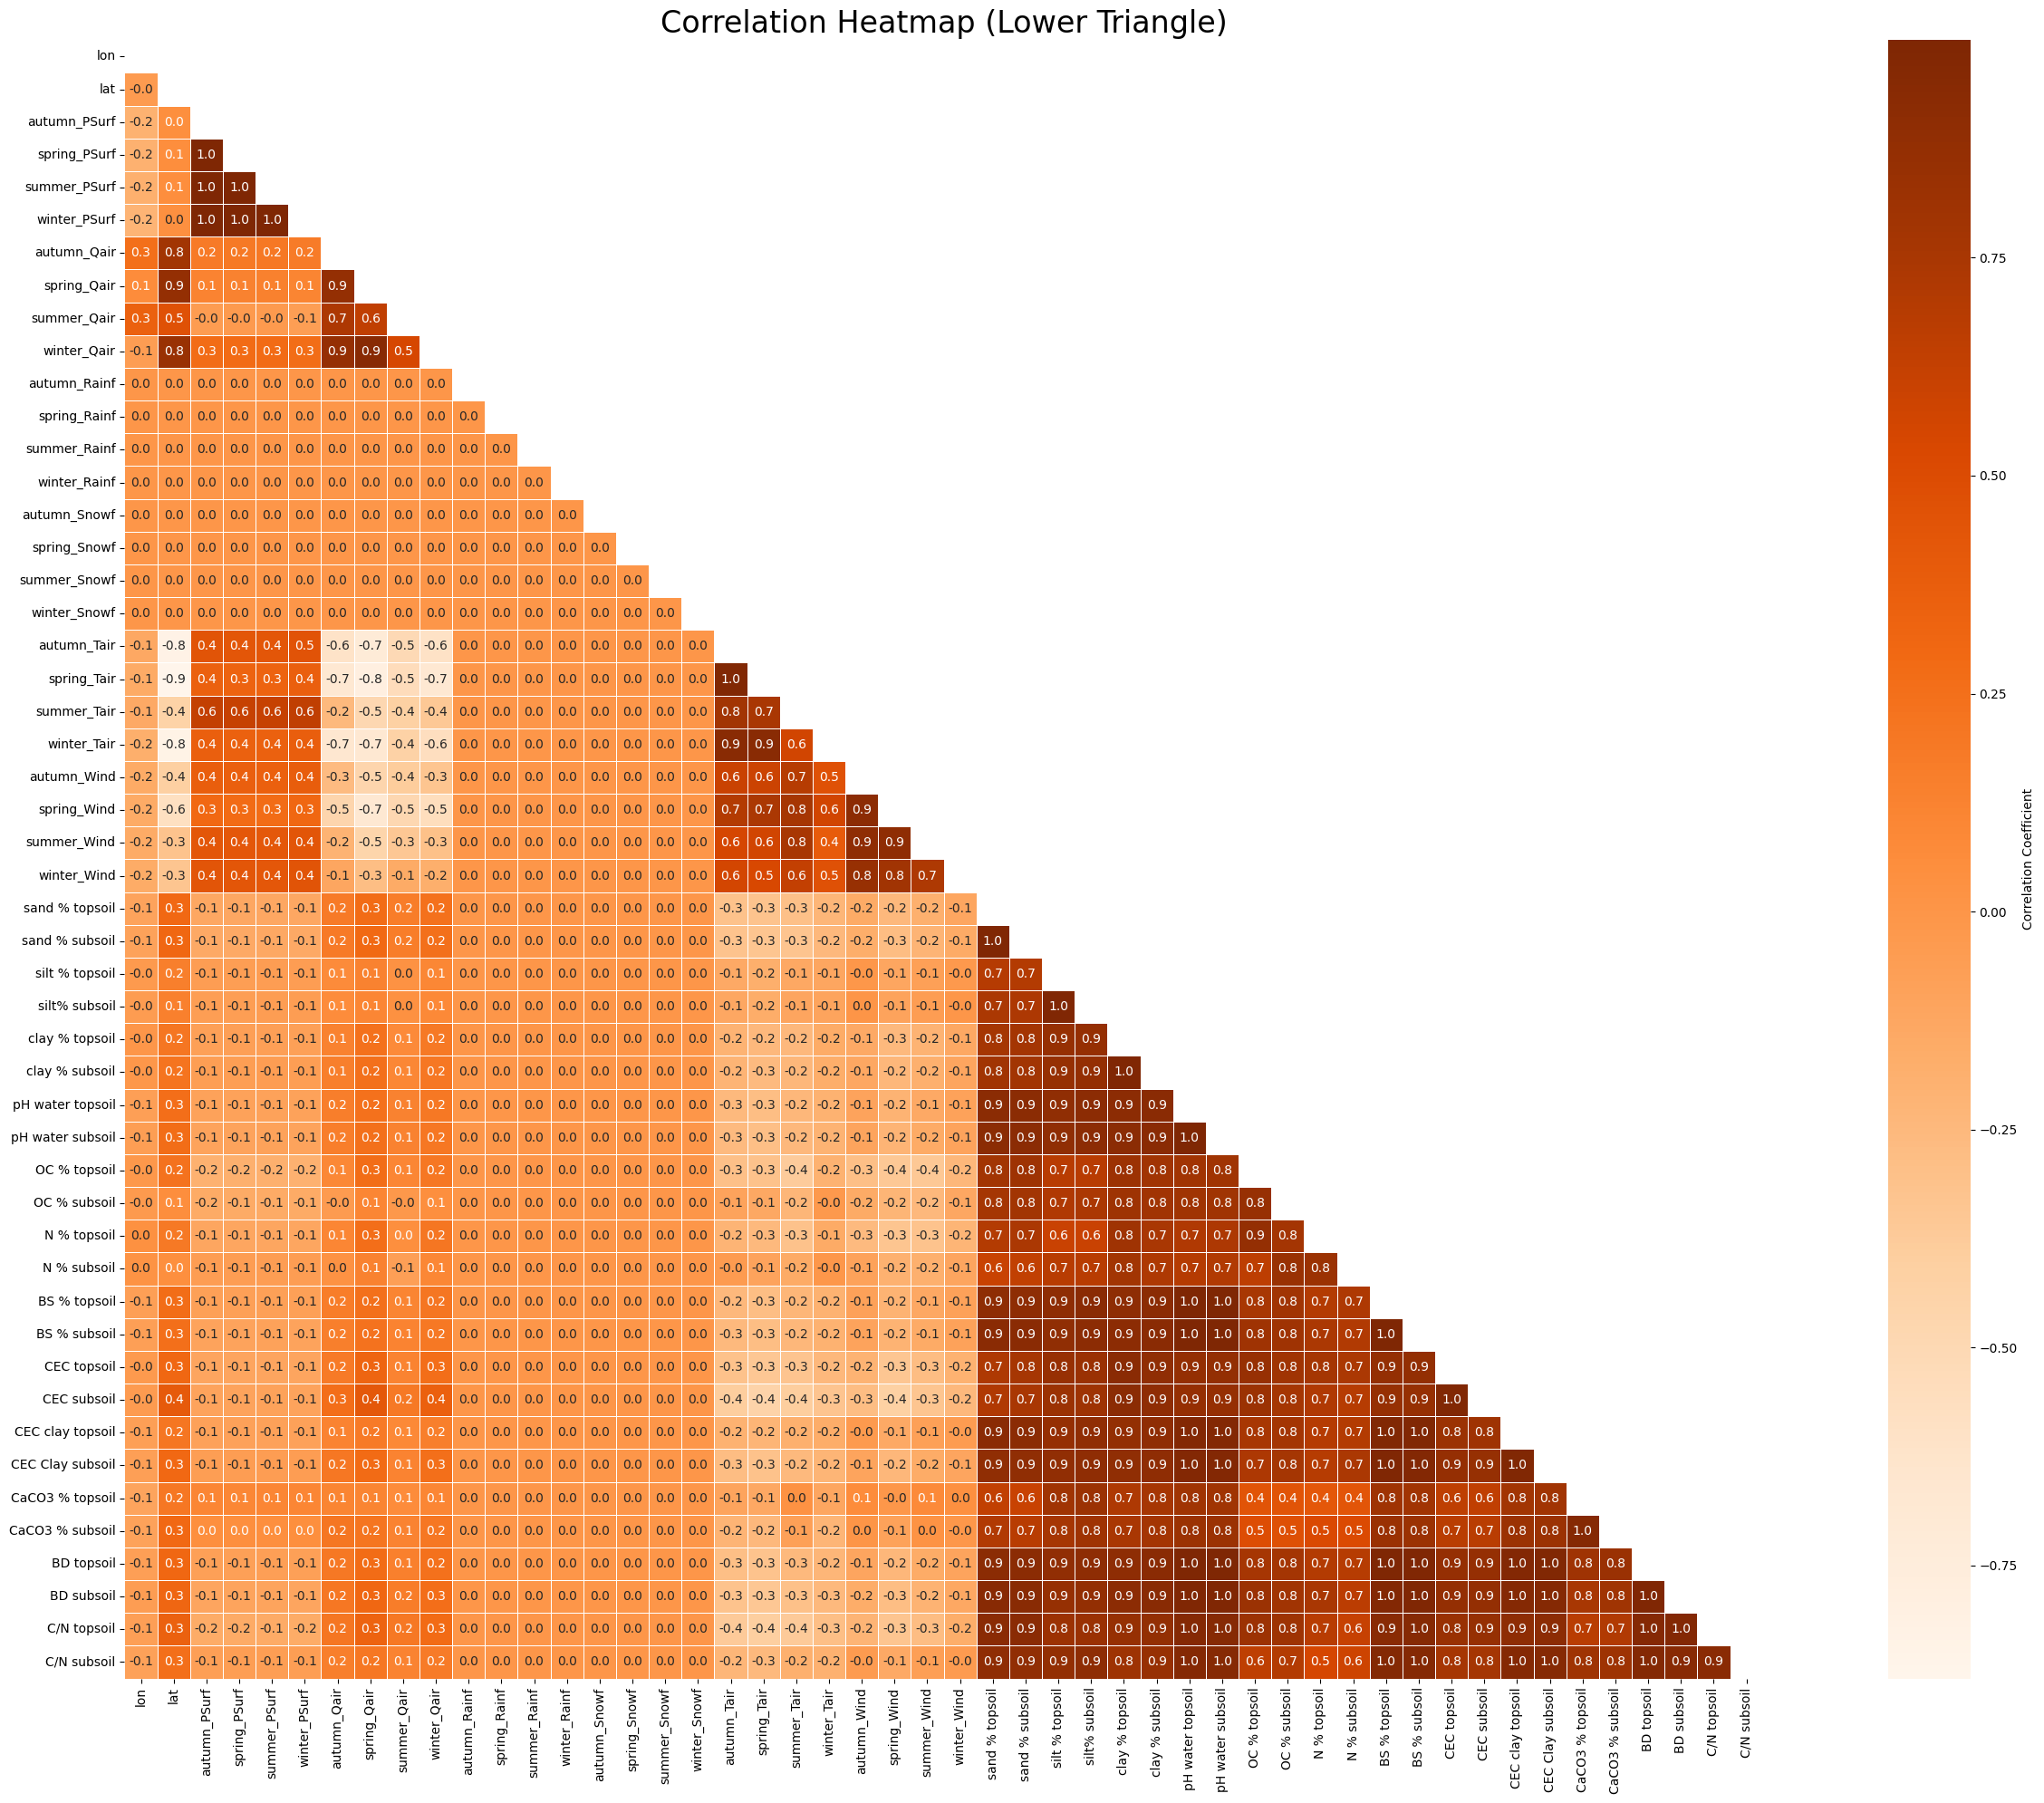

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns from the original dataframe
numeric_data = final_merged_data.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])


correlation_matrix = numeric_data.corr()

correlation_matrix = correlation_matrix.fillna(0)


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


custom_palette = sns.color_palette("Oranges", as_cmap=True)


plt.figure(figsize=(28, 20))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".1f",
    cmap=custom_palette,
    cbar_kws={'label': 'Correlation Coefficient'},
    annot_kws={'size': 10},
    square=True,
    linewidths=0.5,
    mask=mask,  
)

plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

plt.title("Correlation Heatmap (Lower Triangle)", fontsize=24)
plt.tight_layout()
plt.show()


In [28]:
reduced_correlation_rm_df = data_reduction_v_h(final_merged_data,'Correlation-Based Removal')
print(reduced_correlation_rm_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 16 to 1449
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lon              593 non-null    float64
 1   lat              593 non-null    float64
 2   sand % topsoil   593 non-null    float64
 3   silt % topsoil   593 non-null    float64
 4   clay % topsoil   593 non-null    float64
 5   OC % topsoil     593 non-null    float64
 6   OC % subsoil     593 non-null    float64
 7   N % topsoil      593 non-null    float64
 8   N % subsoil      593 non-null    float64
 9   CaCO3 % topsoil  593 non-null    float64
dtypes: float64(10)
memory usage: 51.0 KB
None


In [29]:
csv_path = "reduced_correlation_rm_df.csv"
reduced_correlation_rm_df.to_csv(csv_path, index=False) 

Data normalization

In [ ]:
#min max normalization

In [58]:
min_max_normalized_df = min_max_normalization(final_merged_data, attributes)
print(min_max_normalized_df.head(20))

       lon       lat  autumn_PSurf  spring_PSurf  summer_PSurf  winter_PSurf  \
16   0.000  0.457142      0.627260      0.617731      0.625790      0.645963   
17   0.000  0.485714      0.619851      0.609750      0.617565      0.639257   
18   0.000  0.514285      0.581057      0.570449      0.578209      0.600844   
19   0.000  0.542857      0.622743      0.611558      0.617434      0.643080   
52   0.025  0.457142      0.665632      0.655551      0.662152      0.684633   
53   0.025  0.485714      0.664879      0.654134      0.660555      0.684753   
54   0.025  0.514285      0.586702      0.575660      0.582273      0.607276   
55   0.025  0.542857      0.563571      0.552027      0.558476      0.584503   
56   0.025  0.571428      0.652205      0.640180      0.644218      0.673543   
87   0.050  0.428571      0.653650      0.643876      0.649534      0.671874   
88   0.050  0.457142      0.709593      0.698738      0.704139      0.728750   
89   0.050  0.485714      0.670258      

In [ ]:
#z-score-normalization

In [59]:
z_score_normalized_df = z_score_normalization(final_merged_data, attributes)
print(z_score_normalized_df.head())

         lon       lat  autumn_PSurf  spring_PSurf  summer_PSurf  \
16 -2.516734 -0.221097      0.445383      0.430282      0.448337   
17 -2.516734 -0.104429      0.410214      0.391794      0.408487   
18 -2.516734  0.012238      0.226061      0.202253      0.217826   
19 -2.516734  0.128905      0.423940      0.400514      0.407855   
52 -2.401808 -0.221097      0.627535      0.612678      0.624494   

    winter_PSurf  autumn_Qair  spring_Qair  summer_Qair  winter_Qair  ...  \
16      0.476755    -0.007348     0.496834     1.223306     0.733869  ...   
17      0.444913    -0.077901     0.440049     1.231053     0.668869  ...   
18      0.262509    -0.270089     0.193272     1.197538     0.421698  ...   
19      0.463066    -0.752399    -0.320935     0.511401     0.120001  ...   
52      0.660376    -0.149664     0.248152     1.008132     0.733487  ...   

    CEC topsoil  CEC subsoil  CEC clay topsoil  CEC Clay subsoil  \
16     0.886948     0.987362          0.764477          0.87

Saving results 

In [60]:
csv_path = "min_max_normalized_data.csv"
min_max_normalized_df.to_csv(csv_path, index=False)  


gpkg_path = "min_max_normalized_data.gpkg"
min_max_normalized_df.to_file(gpkg_path, driver="GPKG")

print("Data saved successfully in CSV and GPKG formats.")

Data saved successfully in CSV and GPKG formats.


In [61]:
csv_path = "z_score_normalized_data.csv"
z_score_normalized_df.to_csv(csv_path, index=False)  


gpkg_path = "z_score_data.gpkg"
z_score_normalized_df.to_file(gpkg_path, driver="GPKG")

print("Data saved successfully in CSV and GPKG formats.")

Data saved successfully in CSV and GPKG formats.
